# ML with the linear regression OLS model

In [704]:
# importing the needed libraries

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

## 1. St. Gallen


In [705]:
df_sg = pd.read_excel("2. st_gallen.xlsx")

In [706]:
df_sg.drop("Unnamed: 0", axis=1, inplace=True)

In [707]:
df_sg.info() # checking if the format of the coulmns is appropriate -> that is the case

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Konto   30 non-null     object 
 1   B J     30 non-null     float64
 2   R J     30 non-null     float64
 3   Jahr    30 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [708]:
df_sg

,Konto,B J,R J,Jahr
0,Aufwand,608.9,609.4,2008
1,Ertrag,572.0,611.1,2008
2,Aufwand,622.0,606.9,2009
3,Ertrag,592.3,609.6,2009
4,Aufwand,614.6,600.5,2010
5,Ertrag,586.7,607.1,2010
6,Aufwand,633.6,630.3,2011
7,Ertrag,613.7,630.8,2011
8,Aufwand,647.0,635.2,2012
9,Ertrag,633.8,634.6,2012


#### For the prediction task we'll use the type of expense/income (Konto), the value of the expense/income (R J) and the year (Jahr)

#### Therefore the "B J" column is being dropped and the dataframe is being divided in the two types expense and income

In [709]:
sg_ml_inc = df_sg.loc[df_sg["Konto"] == "Ertrag", ["R J", "Jahr"]].reset_index(drop=True)

In [710]:
sg_ml_exp = df_sg.loc[df_sg["Konto"] == "Aufwand", ["R J", "Jahr"]].reset_index(drop=True)

In [711]:
sg_ml_exp

,R J,Jahr
0,609.4,2008
1,606.9,2009
2,600.5,2010
3,630.3,2011
4,635.2,2012
5,642.9,2013
6,644.9,2014
7,660.8,2015
8,662.0,2016
9,671.3,2017


#### The goal is now to make predictions for both the total expenses and total income. To measure the "out of sample performance" later on, we take out the values for 2020-2022. This corresponds to a 20%, which is going to be the common split for all cities

In [712]:
# saving 2020-2022 for later & taking it out of sg_ml_exp a d sg_ml_inc

sg_ml_exp_oos = sg_ml_exp[sg_ml_exp["Jahr"] >= 2020]
sg_ml_exp = sg_ml_exp[sg_ml_exp["Jahr"] < 2020]

sg_ml_inc_oos = sg_ml_inc[sg_ml_inc["Jahr"] >= 2020]
sg_ml_inc = sg_ml_inc[sg_ml_inc["Jahr"] < 2020]

#### Defining X and y

In [713]:
X_sg_ml_inc = sg_ml_inc["Jahr"]
y_sg_ml_inc = sg_ml_inc["R J"]

X_sg_ml_exp = sg_ml_exp["Jahr"]
y_sg_ml_exp = sg_ml_exp["R J"]


#### Instantiating the model

In [714]:
X_sg_ml_inc = sm.add_constant(X_sg_ml_inc)
model_1_sg_inc = sm.OLS(y_sg_ml_inc, X_sg_ml_inc)

X_sg_ml_exp = sm.add_constant(X_sg_ml_exp)
model_1_sg_exp = sm.OLS(y_sg_ml_exp, X_sg_ml_exp)


In [715]:
print(model_1_sg_inc)

#### Fitting the  models to data

In [716]:
model_1_sg_inc = model_1_sg_inc.fit()
model_1_sg_exp = model_1_sg_exp.fit()

#### Visualizing the results

### 1.1 SG total expenses

In [717]:
print(model_1_sg_exp.summary())

                            OLS Regression Results                            
Dep. Variable:                    R J   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     72.24
Date:                Wed, 24 May 2023   Prob (F-statistic):           6.90e-06
Time:                        15:28:59   Log-Likelihood:                -45.573
No. Observations:                  12   AIC:                             95.15
Df Residuals:                      10   BIC:                             96.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.627e+04   1990.587     -8.175      0.0

c:\Users\Alex Marchese\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [718]:
y_pred_sg_exp = model_1_sg_exp.predict(X_sg_ml_exp)
y_pred_sg_exp

0     599.001282
1     607.404079
2     615.806876
3     624.209674
4     632.612471
5     641.015268
6     649.418065
7     657.820862
8     666.223660
9     674.626457
10    683.029254
11    691.432051
dtype: float64

#### Plotting the regression line

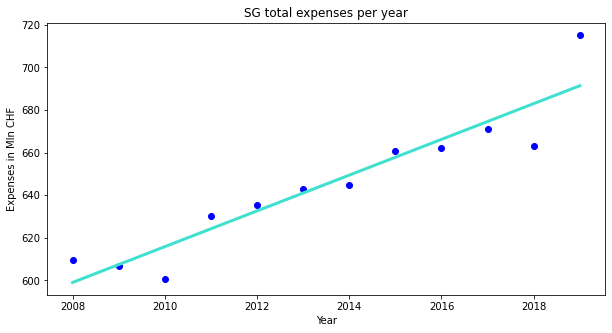

In [719]:
fig, ax = plt.subplots(figsize=(10,5))                             
ax.scatter(sg_ml_exp["Jahr"],sg_ml_exp["R J"], color="blue")
ax.plot(sg_ml_exp["Jahr"], y_pred_sg_exp, color="turquoise", linewidth=3)

ax.set_title("SG total expenses per year")
ax.set_xlabel("Year")
ax.set_ylabel("Expenses in Mln CHF")
plt.show()

In [720]:
residuals_sg_exp = model_1_sg_exp.resid
residuals_sg_exp

0     10.398718
1     -0.504079
2    -15.306876
3      6.090326
4      2.587529
5      1.884732
6     -4.518065
7      2.979138
8     -4.223660
9     -3.326457
10   -19.729254
11    23.667949
dtype: float64

#### SSE (Sum of Squared Errors) & RMSE (Root Mean Squared Error)

In [721]:
SSE_sg_exp = sum(residuals_sg_exp**2)
SSE_sg_exp

1397.6355477856134

In [722]:
RMSE_sg_exp = np.sqrt(np.mean(residuals_sg_exp**2))
RMSE_sg_exp

10.792109570521161

## Measuring the Out of sample performance (based on year 2018)

In [723]:
sg_ml_exp_oos

,R J,Jahr
12,695.8,2020
13,686.1,2021
14,806.7,2022


In [724]:
X_sg_ml_exp_test = sg_ml_exp_oos["Jahr"]
y_sg_ml_exp_test = sg_ml_exp_oos["R J"]
X_sg_ml_exp_test = sm.add_constant(X_sg_ml_exp_test)


In [725]:
y_sg_ml_exp_test

12    695.8
13    686.1
14    806.7
Name: R J, dtype: float64

In [726]:
y_sg_ml_exp_test_pred = model_1_sg_exp.predict(X_sg_ml_exp_test)
y_sg_ml_exp_test_pred

12    699.834848
13    708.237646
14    716.640443
dtype: float64

#### comparison between the predicted results, the budget and the actual one

In [727]:
budget_values = df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["B J"]
print(budget_values)

24    705.5
26    718.3
28    746.5
Name: B J, dtype: float64


In [728]:
comp_sg_exp_oos = pd.DataFrame({"ML prediction":y_sg_ml_exp_test_pred.reset_index(drop=True),
              "budget":budget_values.reset_index(drop=True),
              "actual values":y_sg_ml_exp_test.reset_index(drop=True),
                "year":[2020, 2021, 2022]})

In [729]:
comp_sg_exp_oos

,ML prediction,budget,actual values,year
0,699.834848,705.5,695.8,2020
1,708.237646,718.3,686.1,2021
2,716.640443,746.5,806.7,2022


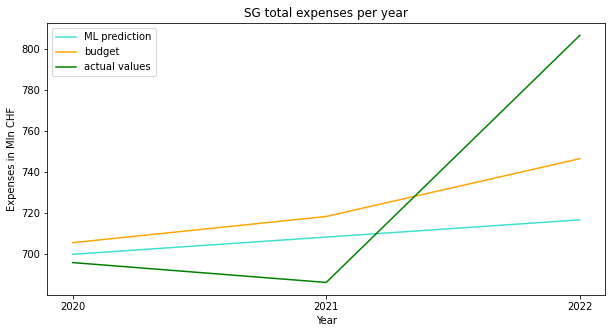

In [730]:
fig, ax = plt.subplots(figsize=(10,5))                           
ax.plot(comp_sg_exp_oos["year"], comp_sg_exp_oos["ML prediction"], color="turquoise", label="ML prediction")
ax.plot(comp_sg_exp_oos["year"], comp_sg_exp_oos["budget"], color="orange", label="budget")
ax.plot(comp_sg_exp_oos["year"], comp_sg_exp_oos["actual values"], color="green", label="actual values")

ax.set_title("SG total expenses per year")
ax.set_xlabel("Year")
ax.set_ylabel("Expenses in Mln CHF")
ax.legend()
ax.xaxis.set_ticks(range(2020, 2022+1, 1))
plt.show()

#### How it would look for all years

In [731]:
df_sg_exp = df_sg[df_sg["Konto"] == "Aufwand"].copy()

In [732]:
df_sg_exp.head()

,Konto,B J,R J,Jahr
0,Aufwand,608.9,609.4,2008
2,Aufwand,622.0,606.9,2009
4,Aufwand,614.6,600.5,2010
6,Aufwand,633.6,630.3,2011
8,Aufwand,647.0,635.2,2012


In [733]:
df_sg_exp = df_sg_exp[["B J", "R J", "Jahr"]]

In [734]:
df_sg_exp["ML prediction"] = round(model_1_sg_exp.predict(sm.add_constant(df_sg_exp["Jahr"])), 1)

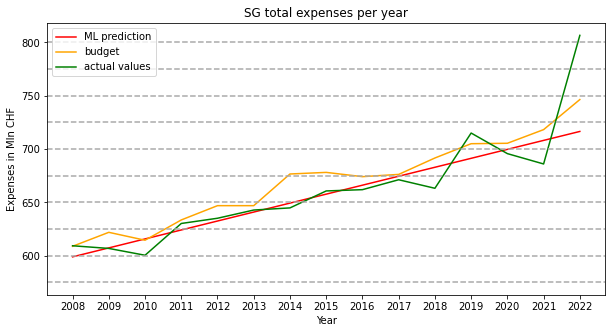

In [735]:
fig, ax = plt.subplots(figsize=(10,5))                             
ax.plot(df_sg_exp["Jahr"], df_sg_exp["ML prediction"], color="red", label="ML prediction")
ax.plot(df_sg_exp["Jahr"], df_sg_exp["B J"], color="orange", label="budget")
ax.plot(df_sg_exp["Jahr"], df_sg_exp["R J"], color="green", label="actual values")

[ax.axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(575, 825, 25)]

ax.set_title("SG total expenses per year")
ax.set_xlabel("Year")
ax.set_ylabel("Expenses in Mln CHF")
ax.legend()
ax.xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 1))
plt.show()

### 1.2 SG total income

In [736]:
df_sg_inc = df_sg[df_sg["Konto"] == "Ertrag"].copy()[["B J", "R J", "Jahr"]]

In [737]:
df_sg_inc["ML prediction"] = round(model_1_sg_exp.predict(sm.add_constant(df_sg_inc["Jahr"])), 1)

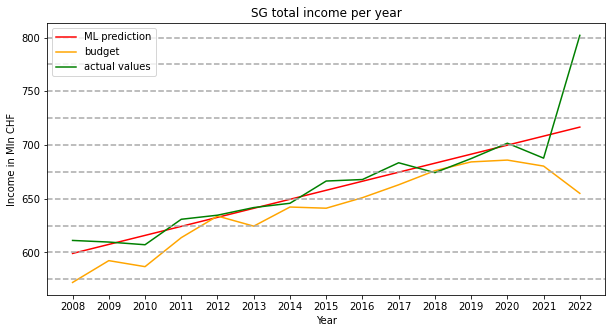

In [738]:
fig, ax = plt.subplots(figsize=(10,5))                             
ax.plot(df_sg_inc["Jahr"], df_sg_inc["ML prediction"], color="red", label="ML prediction")
ax.plot(df_sg_inc["Jahr"], df_sg_inc["B J"], color="orange", label="budget")
ax.plot(df_sg_inc["Jahr"], df_sg_inc["R J"], color="green", label="actual values")

[ax.axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(575, 825, 25)]

ax.set_title("SG total income per year")
ax.set_xlabel("Year")
ax.set_ylabel("Income in Mln CHF")
ax.legend()
ax.xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 1))
plt.show()

#### Income and expenses combined

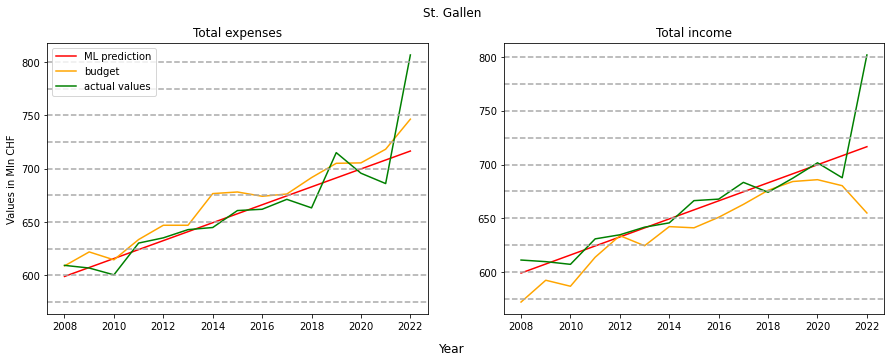

In [739]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("St. Gallen")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_sg_exp["Jahr"], df_sg_exp["ML prediction"], color="red", label="ML prediction")
ax[0].plot(df_sg_exp["Jahr"], df_sg_exp["B J"], color="orange", label="budget")
ax[0].plot(df_sg_exp["Jahr"], df_sg_exp["R J"], color="green", label="actual values")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(575, 825, 25)]

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Values in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 2))

# income
ax[1].plot(df_sg_inc["Jahr"], df_sg_inc["ML prediction"], color="red", label="ML prediction")
ax[1].plot(df_sg_inc["Jahr"], df_sg_inc["B J"], color="orange", label="budget")
ax[1].plot(df_sg_inc["Jahr"], df_sg_inc["R J"], color="green", label="actual values")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(575, 825, 25)]

ax[1].set_title("Total income")

plt.show()

### 1.3 Misprediction of the ML model VS the budget

#### The calculation is going to be the difference between the actual value and the ML model prediction and the difference between the actual value and the budget

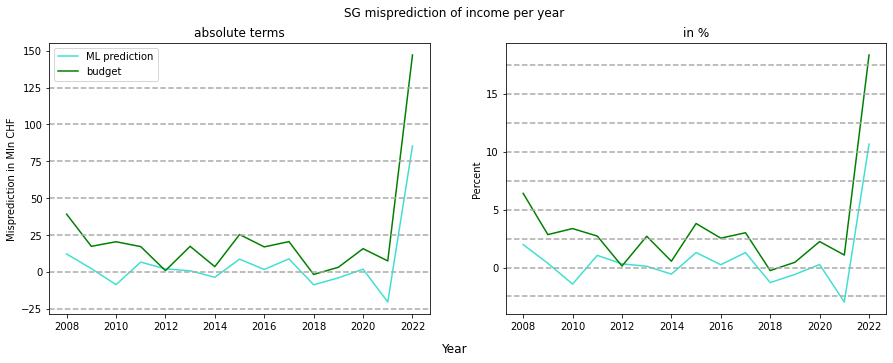

In [740]:
# income
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("SG misprediction of income per year")
fig.supxlabel("Year")

# absolute terms
ax[0].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["ML prediction"]), color="turquoise", label="ML prediction")
ax[0].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["B J"]), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-25, 150, 25)]

ax[0].set_title("absolute terms")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 2))

# in %
ax[1].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["ML prediction"]) / df_sg_inc["R J"] * 100, color="turquoise", label="ML prediction")
ax[1].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["B J"]) / df_sg_inc["R J"] * 100, color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2.5, 20, 2.5)]

ax[1].set_title("in %")
ax[1].set_ylabel("Percent")

plt.show()

#### Given that a deviation is both positive or negative and a reliable prediction is one where these deviations are low, it makes sense to calculate the squared error. This means squaring the difference between the actual value and the prediction or budget.

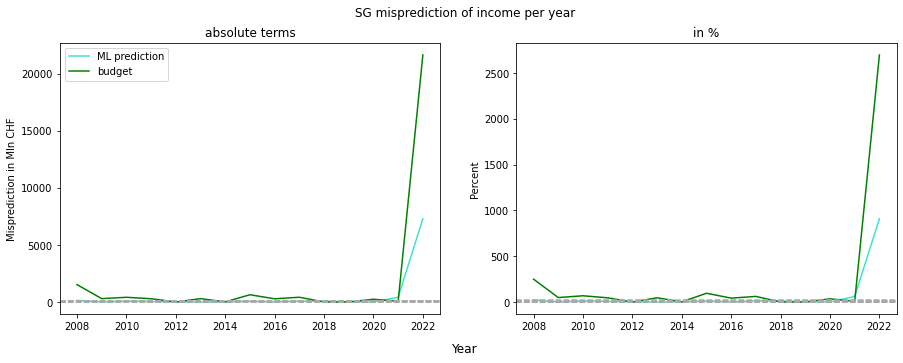

In [741]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("SG misprediction of income per year")
fig.supxlabel("Year")

# absolute terms
ax[0].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["ML prediction"]) ** 2, color="turquoise", label="ML prediction")
ax[0].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["B J"]) ** 2, color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-25, 150, 25)]

ax[0].set_title("absolute terms")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 2))

# in %
ax[1].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["ML prediction"]) ** 2 / df_sg_inc["R J"] * 100, color="turquoise", label="ML prediction")
ax[1].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["B J"]) ** 2 / df_sg_inc["R J"] * 100, color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2.5, 20, 2.5)]

ax[1].set_title("in %")
ax[1].set_ylabel("Percent")

plt.show()

#### Trough the fact that the misprediction of the last year is so high, it is hard to see the other values. Let's try by ignoring that value

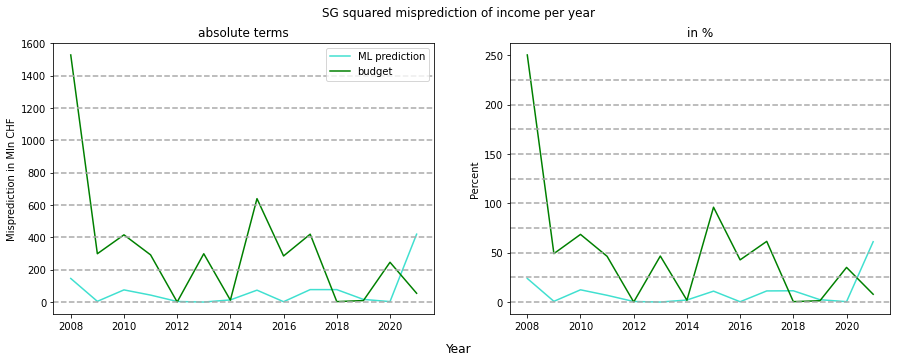

In [742]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("SG squared misprediction of income per year")
fig.supxlabel("Year")

# absolute terms
ax[0].plot(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"], (df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] - df_sg_inc[df_sg_inc["Jahr"] < 2022]["ML prediction"]) ** 2, color="turquoise", label="ML prediction")
ax[0].plot(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"], (df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] - df_sg_inc[df_sg_inc["Jahr"] < 2022]["B J"]) ** 2, color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 1600, 200)]

ax[0].set_title("absolute terms")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"].min(), df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"].max()+1, 2))

# in %
ax[1].plot(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"], (df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] - df_sg_inc[df_sg_inc["Jahr"] < 2022]["ML prediction"]) ** 2 / df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] * 100, color="turquoise", label="ML prediction")
ax[1].plot(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"], (df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] - df_sg_inc[df_sg_inc["Jahr"] < 2022]["B J"]) ** 2 / df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] * 100, color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 250, 25)]

ax[1].set_title("in %")
ax[1].set_ylabel("Percent")

plt.show()

#### The percentage is not really needed here, so we can combine the squared error graphs together

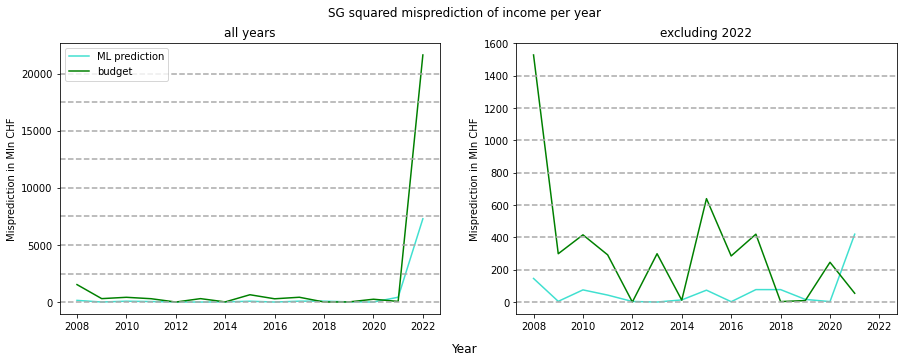

In [743]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("SG squared misprediction of income per year")
fig.supxlabel("Year")

# all years
ax[0].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["ML prediction"]) ** 2, color="turquoise", label="ML prediction")
ax[0].plot(df_sg_inc["Jahr"], (df_sg_inc["R J"] - df_sg_inc["B J"]) ** 2, color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-0, 20250, 2500)]

ax[0].set_title("all years")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 2))

# without 2022
ax[1].plot(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"], (df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] - df_sg_inc[df_sg_inc["Jahr"] < 2022]["ML prediction"]) ** 2, color="turquoise", label="ML prediction")
ax[1].plot(df_sg_inc[df_sg_inc["Jahr"] < 2022]["Jahr"], (df_sg_inc[df_sg_inc["Jahr"] < 2022]["R J"] - df_sg_inc[df_sg_inc["Jahr"] < 2022]["B J"]) ** 2, color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 1600, 200)]

ax[1].set_title("excluding 2022")
ax[1].set_ylabel("Misprediction in Mln CHF")
plt.show()

#### Let's see the prediction of the expense

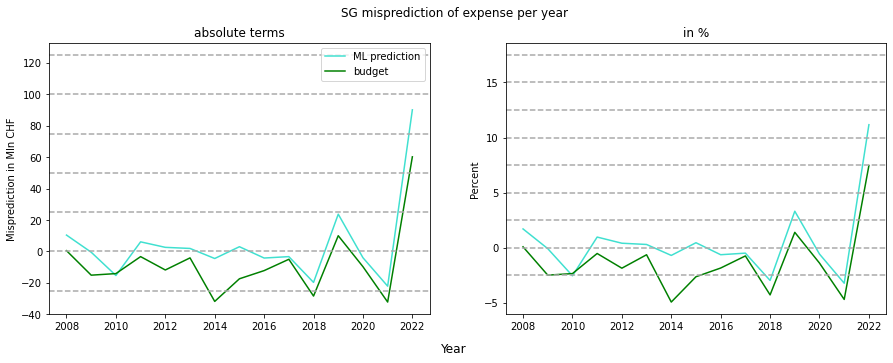

In [744]:
# expense
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("SG misprediction of expense per year")
fig.supxlabel("Year")

# absolute terms
ax[0].plot(df_sg_exp["Jahr"], (df_sg_exp["R J"] - df_sg_exp["ML prediction"]), color="turquoise", label="ML prediction")
ax[0].plot(df_sg_exp["Jahr"], (df_sg_exp["R J"] - df_sg_exp["B J"]), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-25, 150, 25)]

ax[0].set_title("absolute terms")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 2))

# in %
ax[1].plot(df_sg_exp["Jahr"], (df_sg_exp["R J"] - df_sg_exp["ML prediction"]) / df_sg_exp["R J"] * 100, color="turquoise", label="ML prediction")
ax[1].plot(df_sg_exp["Jahr"], (df_sg_exp["R J"] - df_sg_exp["B J"]) / df_sg_exp["R J"] * 100, color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2.5, 20, 2.5)]

ax[1].set_title("in %")
ax[1].set_ylabel("Percent")

plt.show()

#### squaring the misprediction

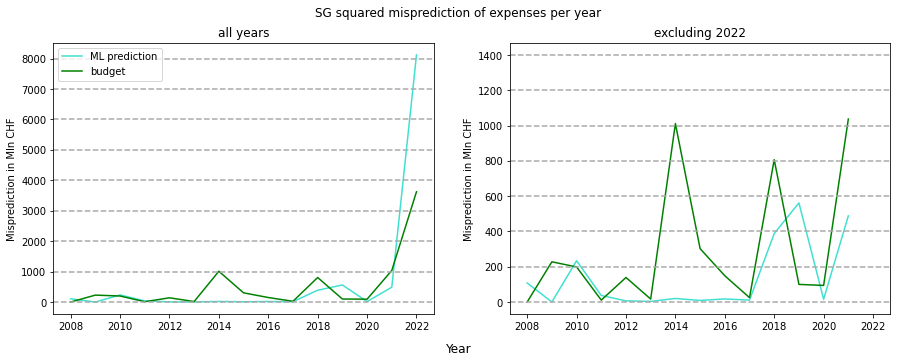

In [745]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("SG squared misprediction of expenses per year")
fig.supxlabel("Year")

# all years
ax[0].plot(df_sg_exp["Jahr"], (df_sg_exp["R J"] - df_sg_exp["ML prediction"]) ** 2, color="turquoise", label="ML prediction")
ax[0].plot(df_sg_exp["Jahr"], (df_sg_exp["R J"] - df_sg_exp["B J"]) ** 2, color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 9000, 1000)]

ax[0].set_title("all years")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 2))

# without 2022
ax[1].plot(df_sg_exp[df_sg_exp["Jahr"] < 2022]["Jahr"], (df_sg_exp[df_sg_exp["Jahr"] < 2022]["R J"] - df_sg_exp[df_sg_exp["Jahr"] < 2022]["ML prediction"]) ** 2, color="turquoise", label="ML prediction")
ax[1].plot(df_sg_exp[df_sg_exp["Jahr"] < 2022]["Jahr"], (df_sg_exp[df_sg_exp["Jahr"] < 2022]["R J"] - df_sg_exp[df_sg_exp["Jahr"] < 2022]["B J"]) ** 2, color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 1600, 200)]

ax[1].set_title("excluding 2022")
ax[1].set_ylabel("Misprediction in Mln CHF")
plt.show()

#### From a visual perspective, the most suitable is showing the misprediction of expenses and income in absolute terms

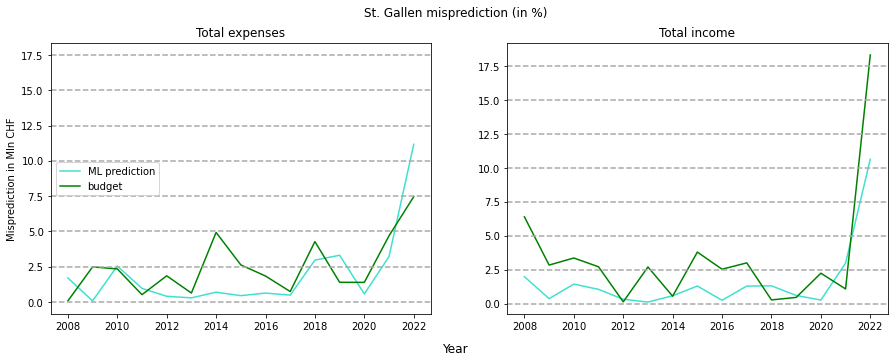

In [746]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("St. Gallen misprediction (in %)")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_sg_exp["Jahr"], abs((df_sg_exp["R J"] - df_sg_exp["ML prediction"]) / df_sg_exp["R J"] * 100), color="turquoise", label="ML prediction")
ax[0].plot(df_sg_exp["Jahr"], abs((df_sg_exp["R J"] - df_sg_exp["B J"]) / df_sg_exp["R J"] * 100), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 20, 2.5)]


ax[0].xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 2))

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 2))

# income
ax[1].plot(df_sg_inc["Jahr"], abs((df_sg_inc["R J"] - df_sg_inc["ML prediction"]) / df_sg_inc["R J"] * 100), color="turquoise", label="ML prediction")
ax[1].plot(df_sg_inc["Jahr"], abs((df_sg_inc["R J"] - df_sg_inc["B J"]) / df_sg_inc["R J"] * 100), color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 20, 2.5)]

ax[1].xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 2))

ax[1].set_title("Total income")

plt.show()

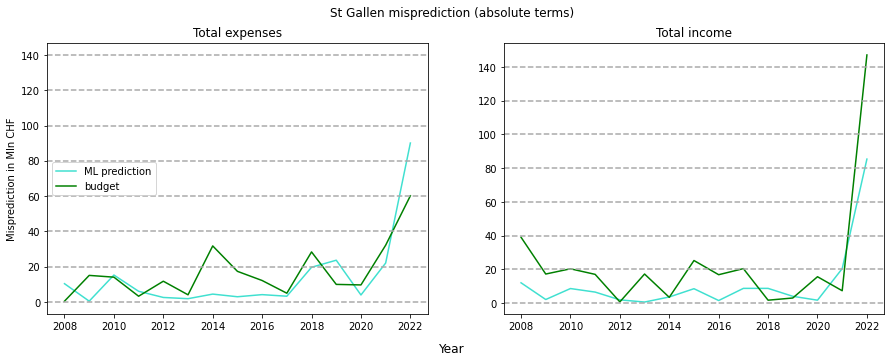

In [747]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("St Gallen misprediction (absolute terms)")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_sg_exp["Jahr"], abs(df_sg_exp["R J"] - df_sg_exp["ML prediction"]), color="turquoise", label="ML prediction")
ax[0].plot(df_sg_exp["Jahr"], abs(df_sg_exp["R J"] - df_sg_exp["B J"]), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 150, 20)]


ax[0].xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 2))

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_sg_exp["Jahr"].min(), df_sg_exp["Jahr"].max()+1, 2))

# income
ax[1].plot(df_sg_inc["Jahr"], abs(df_sg_inc["R J"] - df_sg_inc["ML prediction"]), color="turquoise", label="ML prediction")
ax[1].plot(df_sg_inc["Jahr"], abs(df_sg_inc["R J"] - df_sg_inc["B J"]), color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 150, 20)]

ax[1].xaxis.set_ticks(range(df_sg_inc["Jahr"].min(), df_sg_inc["Jahr"].max()+1, 2))

ax[1].set_title("Total income")

plt.show()

#### Let's calculate the sum of squared error (SSE) and the root mean squared error (RMSE) to have a value for overall comparison

#### Expenses

In [748]:
# ML prediction
SSE_sg_exp_ml = sum((df_sg_exp["R J"] - df_sg_exp["ML prediction"]) ** 2)
RMSE_sg_exp_ml = np.sqrt(SSE_sg_exp_ml / len(df_sg_exp["R J"]))

# budget
SSE_sg_exp_bud = sum((df_sg_exp["R J"] - df_sg_exp["B J"]) ** 2)
RMSE_sg_exp_bud = np.sqrt(SSE_sg_exp_bud / len(df_sg_exp["R J"]))

In [749]:
RMSE_sg_exp_ml

25.845773348847594

In [750]:
RMSE_sg_exp_bud

22.720592715273387

#### Income

In [751]:
SSE_sg_inc_ml = sum((df_sg_inc["R J"] - df_sg_inc["ML prediction"]) ** 2)
RMSE_sg_inc_ml = np.sqrt(SSE_sg_inc_ml / len(df_sg_inc["R J"]))

SSE_sg_inc_bud = sum((df_sg_inc["R J"] - df_sg_inc["B J"]) ** 2)
RMSE_sg_inc_bud = np.sqrt(SSE_sg_inc_bud / len(df_sg_inc["R J"]))

In [752]:
RMSE_sg_inc_ml

23.457109796392213

In [753]:
RMSE_sg_inc_bud

41.75109579400283

In [754]:
print(f"""
RMSEs for St. Gallen \n
Total expenses: ML = {round(RMSE_sg_exp_ml, 2)} | budget = {round(RMSE_sg_exp_bud, 2)} 
Total income:   ML = {round(RMSE_sg_inc_ml, 2)} | budget = {round(RMSE_sg_inc_bud, 2)} 
""")


RMSEs for St. Gallen 

Total expenses: ML = 25.85 | budget = 22.72 
Total income:   ML = 23.46 | budget = 41.75 



#### In sum, for St. Gallen, the RMSE of the budget prediction was slightly lower for the total expenses but higher for the total income. This means that the ML model was slightly worse for the expenses and significantly better for the income

#### Quickly reperforming all the steps in a concise way. This helps perform some actions more efficiently

In [755]:
# importing the DF
df_sg = pd.read_excel("2. st_gallen.xlsx").drop("Unnamed: 0", axis=1)

In [756]:
df_sg["Jahr"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022], dtype=int64)

In [757]:
df_sg.head()

,Konto,B J,R J,Jahr
0,Aufwand,608.9,609.4,2008
1,Ertrag,572.0,611.1,2008
2,Aufwand,622.0,606.9,2009
3,Ertrag,592.3,609.6,2009
4,Aufwand,614.6,600.5,2010


In [758]:
# instantiating and fitting the two models
model_1_sg_inc = sm.OLS(df_sg[(df_sg["Jahr"] < 2020) & (df_sg["Konto"] == "Ertrag")]["R J"], sm.add_constant(df_sg[(df_sg["Jahr"] < 2020) & (df_sg["Konto"] == "Ertrag")]["Jahr"])).fit()
model_1_sg_exp = sm.OLS(df_sg[(df_sg["Jahr"] < 2020) & (df_sg["Konto"] == "Aufwand")]["R J"], sm.add_constant(df_sg[(df_sg["Jahr"] < 2020) & (df_sg["Konto"] == "Aufwand")]["Jahr"])).fit()

In [759]:
# adding the prediction directly to the initial df

df_sg.loc[df_sg["Konto"] == "Ertrag", "ML prediction"] = round(model_1_sg_inc.predict(sm.add_constant(df_sg[df_sg["Konto"] == "Ertrag"]["Jahr"])), 1)
df_sg.loc[df_sg["Konto"] == "Aufwand", "ML prediction"] = round(model_1_sg_exp.predict(sm.add_constant(df_sg[df_sg["Konto"] == "Aufwand"]["Jahr"])), 1)

In [760]:
df_sg.head()

,Konto,B J,R J,Jahr,ML prediction
0,Aufwand,608.9,609.4,2008,599.0
1,Ertrag,572.0,611.1,2008,603.6
2,Aufwand,622.0,606.9,2009,607.4
3,Ertrag,592.3,609.6,2009,611.4
4,Aufwand,614.6,600.5,2010,615.8


In [761]:
## Calculating the RMSEs

# expenses
RMSE_sg_exp_ml = np.sqrt(sum((df_sg[df_sg["Konto"] == "Aufwand"]["R J"] - df_sg[df_sg["Konto"] == "Aufwand"]["ML prediction"]) ** 2) / len(df_sg[df_sg["Konto"] == "Aufwand"]["R J"]))
RMSE_sg_exp_bud = np.sqrt(sum((df_sg[df_sg["Konto"] == "Aufwand"]["R J"] - df_sg[df_sg["Konto"] == "Aufwand"]["B J"]) ** 2) / len(df_sg[df_sg["Konto"] == "Aufwand"]["R J"]))

# income
RMSE_sg_inc_ml = np.sqrt(sum((df_sg[df_sg["Konto"] == "Ertrag"]["R J"] - df_sg[df_sg["Konto"] == "Ertrag"]["ML prediction"]) ** 2) / len(df_sg[df_sg["Konto"] == "Ertrag"]["R J"]))
RMSE_sg_inc_bud = np.sqrt(sum((df_sg[df_sg["Konto"] == "Ertrag"]["R J"] - df_sg[df_sg["Konto"] == "Ertrag"]["B J"]) ** 2) / len(df_sg[df_sg["Konto"] == "Ertrag"]["R J"]))

## 2. Zurich

#### For St. Gallen the model was instantiated step by step, to better show the approach. All the steps will be shown in a more compact manner

#### As before (common to all 3 municipalities) 20% of the observations are taken away as out of sample

In [762]:
# importing the DF
df_zh = pd.read_excel("2. zurich.xlsx").drop("Unnamed: 0", axis=1)

In [763]:
df_zh["Jahr"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [764]:
df_zh

,Konto,B J,R J,Jahr
0,Aufwand,7905.5,7770.9,2010
1,Ertrag,7630.0,7714.7,2010
2,Aufwand,7978.5,7849.7,2011
3,Ertrag,7922.0,7843.9,2011
4,Aufwand,8439.3,8331.1,2012
5,Ertrag,8378.9,8298.0,2012
6,Aufwand,8357.4,8214.7,2013
7,Ertrag,8262.5,8228.7,2013
8,Aufwand,8443.3,8541.3,2014
9,Ertrag,8229.8,8484.6,2014


#### We have 13 observations. Taking 3 would be slighlty more than 20% but the closes whole number. Therefore we are taking the years 2020-2022 as out of sample

In [765]:
# instantiating and fitting the two models
model_2_zh_inc = sm.OLS(df_zh[(df_zh["Jahr"] < 2020) & (df_zh["Konto"] == "Ertrag")]["R J"], sm.add_constant(df_zh[(df_zh["Jahr"] < 2020) & (df_zh["Konto"] == "Ertrag")]["Jahr"])).fit()
model_2_zh_exp = sm.OLS(df_zh[(df_zh["Jahr"] < 2020) & (df_zh["Konto"] == "Aufwand")]["R J"], sm.add_constant(df_zh[(df_zh["Jahr"] < 2020) & (df_zh["Konto"] == "Aufwand")]["Jahr"])).fit()

In [766]:
# adding the prediction directly to the initial df

df_zh.loc[df_zh["Konto"] == "Ertrag", "ML prediction"] = round(model_2_zh_inc.predict(sm.add_constant(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"])), 1)
df_zh.loc[df_zh["Konto"] == "Aufwand", "ML prediction"] = round(model_2_zh_exp.predict(sm.add_constant(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"])), 1)

In [767]:
df_zh.head()

,Konto,B J,R J,Jahr,ML prediction
0,Aufwand,7905.5,7770.9,2010,7906.1
1,Ertrag,7630.0,7714.7,2010,7826.5
2,Aufwand,7978.5,7849.7,2011,8035.8
3,Ertrag,7922.0,7843.9,2011,7988.8
4,Aufwand,8439.3,8331.1,2012,8165.4


#### Everything worked as intended. It is now time to plot the data

#### Prediction of total expenses and income

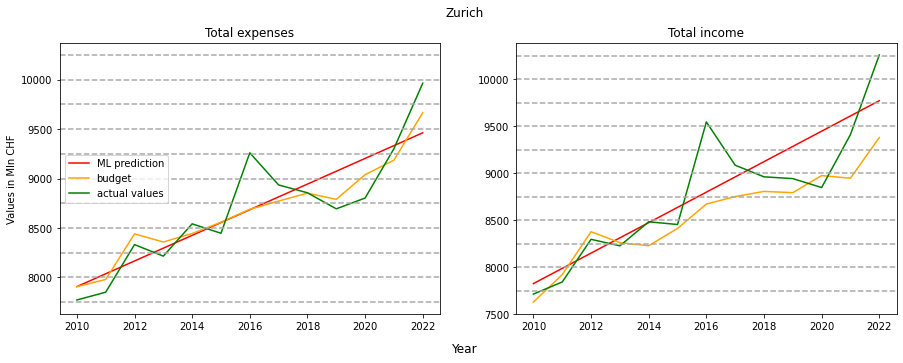

In [768]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("Zurich")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], df_zh[df_zh["Konto"] == "Aufwand"]["ML prediction"], color="red", label="ML prediction")
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], df_zh[df_zh["Konto"] == "Aufwand"]["B J"], color="orange", label="budget")
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], df_zh[df_zh["Konto"] == "Aufwand"]["R J"], color="green", label="actual values")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(7750, 10500, 250)]

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Values in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].max()+1, 2))

# income
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], df_zh[df_zh["Konto"] == "Ertrag"]["ML prediction"], color="red", label="ML prediction")
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], df_zh[df_zh["Konto"] == "Ertrag"]["B J"], color="orange", label="budget")
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], df_zh[df_zh["Konto"] == "Ertrag"]["R J"], color="green", label="actual values")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(7750, 10500, 250)]

ax[1].set_title("Total income")

plt.show()

#### Misprediction - ML model VS budget

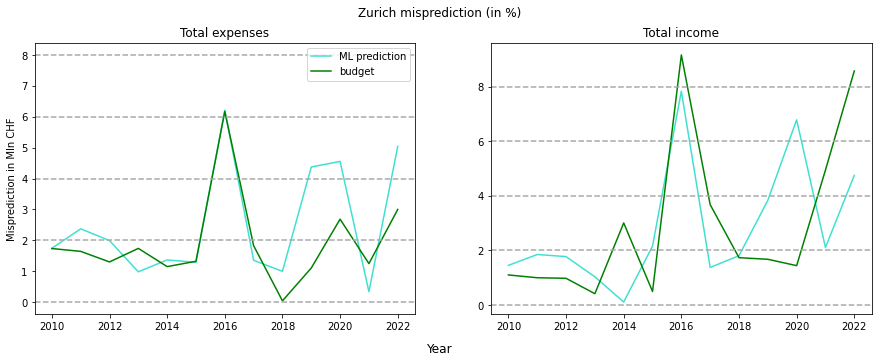

In [769]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("Zurich misprediction (in %)")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], abs((df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["ML prediction"]) / df_zh[df_zh["Konto"] == "Aufwand"]["R J"] * 100), color="turquoise", label="ML prediction")
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], abs((df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["B J"]) / df_zh[df_zh["Konto"] == "Aufwand"]["R J"] * 100), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 10, 2)]


ax[0].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

# income
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], abs((df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["ML prediction"]) / df_zh[df_zh["Konto"] == "Ertrag"]["R J"] * 100), color="turquoise", label="ML prediction")
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], abs((df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["B J"]) / df_zh[df_zh["Konto"] == "Ertrag"]["R J"] * 100), color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 10, 2)]

ax[1].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].max()+1, 2))

ax[1].set_title("Total income")

plt.show()

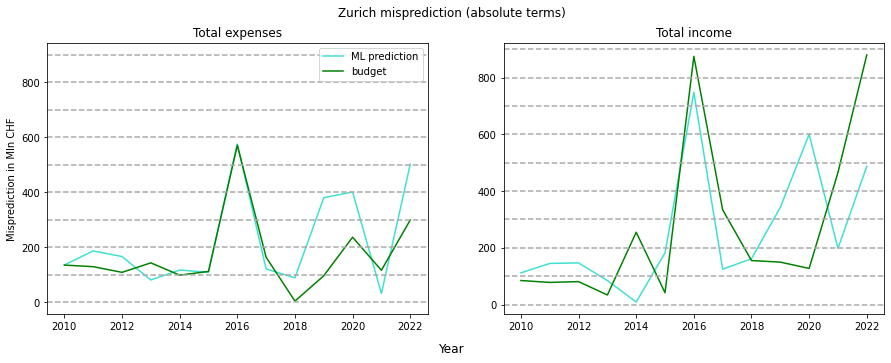

In [770]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("Zurich misprediction (absolute terms)")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], abs(df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["ML prediction"]), color="turquoise", label="ML prediction")
ax[0].plot(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"], abs(df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["B J"]), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 1000, 100)]


ax[0].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

# income
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], abs(df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["ML prediction"]), color="turquoise", label="ML prediction")
ax[1].plot(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"], abs(df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["B J"]), color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 1000, 100)]

ax[1].xaxis.set_ticks(range(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].min(), df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].max()+1, 2))

ax[1].set_title("Total income")

plt.show()

#### Calculating the RMSEs 

In [771]:
# expenses
RMSE_zh_exp_ml = np.sqrt(sum((df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["ML prediction"]) ** 2) / len(df_zh[df_zh["Konto"] == "Aufwand"]["R J"]))
RMSE_zh_exp_bud = np.sqrt(sum((df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["B J"]) ** 2) / len(df_zh[df_zh["Konto"] == "Aufwand"]["R J"]))

# income
RMSE_zh_inc_ml = np.sqrt(sum((df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["ML prediction"]) ** 2) / len(df_zh[df_zh["Konto"] == "Ertrag"]["R J"]))
RMSE_zh_inc_bud = np.sqrt(sum((df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["B J"]) ** 2) / len(df_zh[df_zh["Konto"] == "Ertrag"]["R J"]))

In [772]:
print(f"""
RMSEs for Zurich \n
Total expenses: ML = {round(RMSE_zh_exp_ml, 2)} | budget = {round(RMSE_zh_exp_bud, 2)} 
Total income:   ML = {round(RMSE_zh_inc_ml, 2)} | budget = {round(RMSE_zh_inc_bud, 2)} 
""")


RMSEs for Zurich 

Total expenses: ML = 280.59 | budget = 216.52 
Total income:   ML = 334.02 | budget = 393.87 



## 3. Bern

In [773]:
# importing the DF
df_be = pd.read_excel("2. bern.xlsx").drop("Unnamed: 0", axis=1)

In [774]:
df_be["Jahr"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [775]:
df_be.head()

,Konto,B J,R J,Jahr
0,Aufwand,896.9,881.2,2005
1,Ertrag,896.9,881.2,2005
2,Aufwand,938.4,937.7,2006
3,Ertrag,938.4,937.7,2006
4,Aufwand,921.4,997.2,2007


#### This time the 20% is closer to the whole number 4. Years 2019-2022 will be taken

In [776]:
# instantiating and fitting the two models
model_3_be_inc = sm.OLS(df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Ertrag")]["R J"], sm.add_constant(df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Ertrag")]["Jahr"])).fit()
model_3_be_exp = sm.OLS(df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Aufwand")]["R J"], sm.add_constant(df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Aufwand")]["Jahr"])).fit()

In [777]:
# adding the prediction directly to the initial df

df_be.loc[df_be["Konto"] == "Ertrag", "ML prediction"] = round(model_3_be_inc.predict(sm.add_constant(df_be[df_be["Konto"] == "Ertrag"]["Jahr"])), 1)
df_be.loc[df_be["Konto"] == "Aufwand", "ML prediction"] = round(model_3_be_exp.predict(sm.add_constant(df_be[df_be["Konto"] == "Aufwand"]["Jahr"])), 1)

In [778]:
df_be.head()

,Konto,B J,R J,Jahr,ML prediction
0,Aufwand,896.9,881.2,2005,881.6
1,Ertrag,896.9,881.2,2005,887.0
2,Aufwand,938.4,937.7,2006,910.0
3,Ertrag,938.4,937.7,2006,915.3
4,Aufwand,921.4,997.2,2007,938.5


#### Everything worked as intended -> plotting the data

#### Prediction of total expenses and income

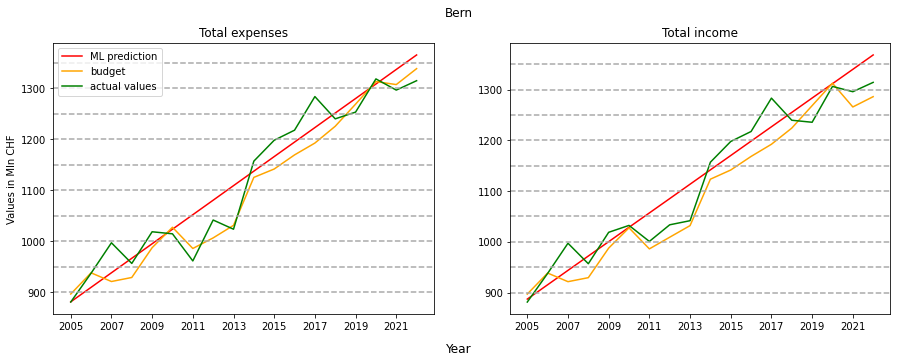

In [779]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("Bern")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], df_be[df_be["Konto"] == "Aufwand"]["ML prediction"], color="red", label="ML prediction")
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], df_be[df_be["Konto"] == "Aufwand"]["B J"], color="orange", label="budget")
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], df_be[df_be["Konto"] == "Aufwand"]["R J"], color="green", label="actual values")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(900, 1400, 50)]

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Values in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Ertrag"]["Jahr"].min(), df_be[df_be["Konto"] == "Ertrag"]["Jahr"].max()+1, 2))

# income
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], df_be[df_be["Konto"] == "Ertrag"]["ML prediction"], color="red", label="ML prediction")
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], df_be[df_be["Konto"] == "Ertrag"]["B J"], color="orange", label="budget")
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], df_be[df_be["Konto"] == "Ertrag"]["R J"], color="green", label="actual values")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(900, 1400, 50)]

ax[1].set_title("Total income")

plt.show()

#### Misprediction - ML model VS budget

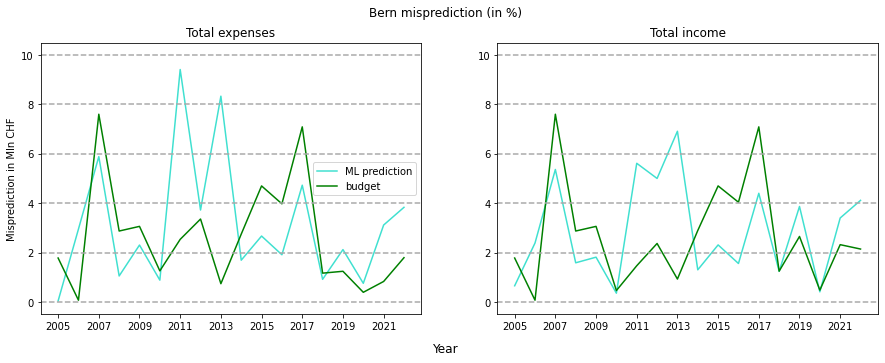

In [780]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("Bern misprediction (in %)")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], abs((df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["ML prediction"]) / df_be[df_be["Konto"] == "Aufwand"]["R J"] * 100), color="turquoise", label="ML prediction")
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], abs((df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["B J"]) / df_be[df_be["Konto"] == "Aufwand"]["R J"] * 100), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 12, 2)]


ax[0].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Aufwand"]["Jahr"].min(), df_be[df_be["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Aufwand"]["Jahr"].min(), df_be[df_be["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

# income
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], abs((df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["ML prediction"]) / df_be[df_be["Konto"] == "Ertrag"]["R J"] * 100), color="turquoise", label="ML prediction")
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], abs((df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["B J"]) / df_be[df_be["Konto"] == "Ertrag"]["R J"] * 100), color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 12, 2)]

ax[1].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Ertrag"]["Jahr"].min(), df_be[df_be["Konto"] == "Ertrag"]["Jahr"].max()+1, 2))

ax[1].set_title("Total income")

plt.show()

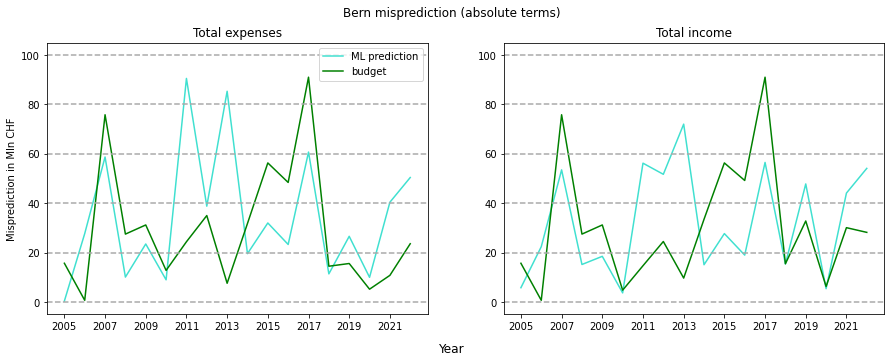

In [781]:
# income -> squared difference
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)     
fig.suptitle("Bern misprediction (absolute terms)")
fig.supxlabel("Year")

# expenses
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], abs(df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["ML prediction"]), color="turquoise", label="ML prediction")
ax[0].plot(df_be[df_be["Konto"] == "Aufwand"]["Jahr"], abs(df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["B J"]), color="green", label="budget")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 120, 20)]


ax[0].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Aufwand"]["Jahr"].min(), df_be[df_be["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

ax[0].set_title("Total expenses")
ax[0].set_ylabel("Misprediction in Mln CHF")
ax[0].legend()

ax[0].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Aufwand"]["Jahr"].min(), df_be[df_be["Konto"] == "Aufwand"]["Jahr"].max()+1, 2))

# income
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], abs(df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["ML prediction"]), color="turquoise", label="ML prediction")
ax[1].plot(df_be[df_be["Konto"] == "Ertrag"]["Jahr"], abs(df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["B J"]), color="green", label="budget")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(0, 120, 20)]

ax[1].xaxis.set_ticks(range(df_be[df_be["Konto"] == "Ertrag"]["Jahr"].min(), df_be[df_be["Konto"] == "Ertrag"]["Jahr"].max()+1, 2))

ax[1].set_title("Total income")

plt.show()

#### Calculating the RMSEs 

In [782]:
# expenses
RMSE_be_exp_ml = np.sqrt(sum((df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["ML prediction"]) ** 2) / len(df_be[df_be["Konto"] == "Aufwand"]["R J"]))
RMSE_be_exp_bud = np.sqrt(sum((df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["B J"]) ** 2) / len(df_be[df_be["Konto"] == "Aufwand"]["R J"]))

# income
RMSE_be_inc_ml = np.sqrt(sum((df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["ML prediction"]) ** 2) / len(df_be[df_be["Konto"] == "Ertrag"]["R J"]))
RMSE_be_inc_bud = np.sqrt(sum((df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["B J"]) ** 2) / len(df_be[df_be["Konto"] == "Ertrag"]["R J"]))

In [783]:
print(f"""
RMSEs for Bern \n
Total expenses: ML = {round(RMSE_be_exp_ml, 2)} | budget = {round(RMSE_be_exp_bud, 2)} 
Total income:   ML = {round(RMSE_be_inc_ml, 2)} | budget = {round(RMSE_be_inc_bud, 2)} 
""")


RMSEs for Bern 

Total expenses: ML = 42.6 | budget = 37.8 
Total income:   ML = 38.71 | budget = 38.52 



## 4. Comparison across cities

#### All the RMSE values at one glance

In [784]:
print(f"""
Comparison of all RMSE values 
--------------------------------------------------------
St. Gallen
Total expenses: ML = {round(RMSE_sg_exp_ml, 2)}  | budget = {round(RMSE_sg_exp_bud, 2)}   | budget
Total income:   ML = {round(RMSE_sg_inc_ml, 2)}  | budget = {round(RMSE_sg_inc_bud, 2)}   | ML 
--------------------------------------------------------
Zurich
Total expenses: ML = {round(RMSE_zh_exp_ml, 2)} | budget = {round(RMSE_zh_exp_bud, 2)}  | budget
Total income:   ML = {round(RMSE_zh_inc_ml, 2)} | budget = {round(RMSE_zh_inc_bud, 2)}  | ML
--------------------------------------------------------
Bern
Total expenses: ML = {round(RMSE_be_exp_ml, 2)}   | budget = {round(RMSE_be_exp_bud, 2)}    | budget
Total income:   ML = {round(RMSE_be_inc_ml, 2)}  | budget = {round(RMSE_be_inc_bud, 2)}   | budget
""")


Comparison of all RMSE values 
--------------------------------------------------------
St. Gallen
Total expenses: ML = 25.85  | budget = 22.72   | budget
Total income:   ML = 24.05  | budget = 41.75   | ML 
--------------------------------------------------------
Zurich
Total expenses: ML = 280.59 | budget = 216.52  | budget
Total income:   ML = 334.02 | budget = 393.87  | ML
--------------------------------------------------------
Bern
Total expenses: ML = 42.6   | budget = 37.8    | budget
Total income:   ML = 38.71  | budget = 38.52   | budget



#### Calculating the RMSE values for the out of sample data

#### These are the respective years
- St. Gallen (2020 - 2022)
- Zurich (2020 - 2022)
- Bern (2019 - 2022)

In [785]:
df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]

,Konto,B J,R J,Jahr,ML prediction
20,Aufwand,9038.5,8802.3,2020,9203.0
22,Aufwand,9185.7,9301.4,2021,9332.6
24,Aufwand,9665.4,9964.2,2022,9462.3


In [786]:
## St. Gallen
# expenses
RMSE_sg_exp_ml_oos = np.sqrt(sum((df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["R J"] - df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["ML prediction"]) ** 2) / len(df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["R J"]))
RMSE_sg_exp_bud_oos = np.sqrt(sum((df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["R J"] - df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["B J"]) ** 2) / len(df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2020)]["R J"]))

# income
RMSE_sg_inc_ml_oos = np.sqrt(sum((df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2020)]["R J"] - df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2020)]["ML prediction"]) ** 2) / len(df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2020)]["R J"]))
RMSE_sg_inc_bud_oos = np.sqrt(sum((df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2020)]["R J"] - df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2020)]["B J"]) ** 2) / len(df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2020)]["R J"]))


## Zurich
# expenses
RMSE_zh_exp_ml_oos = np.sqrt(sum((df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]["R J"] - df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]["ML prediction"]) ** 2) / len(df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]["R J"]))
RMSE_zh_exp_bud_oos = np.sqrt(sum((df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]["R J"] - df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]["B J"]) ** 2) / len(df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2020)]["R J"]))

# income
RMSE_zh_inc_ml_oos = np.sqrt(sum((df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2020)]["R J"] - df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2020)]["ML prediction"]) ** 2) / len(df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2020)]["R J"]))
RMSE_zh_inc_bud_oos = np.sqrt(sum((df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2020)]["R J"] - df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2020)]["B J"]) ** 2) / len(df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2020)]["R J"]))

## Bern
# expenses
RMSE_be_exp_ml_oos = np.sqrt(sum((df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["R J"] - df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["ML prediction"]) ** 2) / len(df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["R J"]))
RMSE_be_exp_bud_oos = np.sqrt(sum((df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["R J"] - df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["B J"]) ** 2) / len(df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["R J"]))

# income
RMSE_be_inc_ml_oos = np.sqrt(sum((df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["R J"] - df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["ML prediction"]) ** 2) / len(df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["R J"]))
RMSE_be_inc_bud_oos = np.sqrt(sum((df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["R J"] - df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["B J"]) ** 2) / len(df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["R J"]))

In [787]:
print(f"""
Comparison of all RMSE values                                           
--------------------------------------------------------
St. Gallen
Total expenses: ML = {round(RMSE_sg_exp_ml_oos, 2)}  | budget = {round(RMSE_sg_exp_bud_oos, 2)}   | budget
Total income:   ML = {round(RMSE_sg_inc_ml_oos, 2)}  | budget = {round(RMSE_sg_inc_bud_oos, 2)}   | ML 
--------------------------------------------------------
Zurich
Total expenses: ML = {round(RMSE_zh_exp_ml_oos, 2)} | budget = {round(RMSE_zh_exp_bud_oos, 2)}  | budget
Total income:   ML = {round(RMSE_zh_inc_ml_oos, 2)} | budget = {round(RMSE_zh_inc_bud_oos, 2)}  | ML
--------------------------------------------------------
Bern
Total expenses: ML = {round(RMSE_be_exp_ml_oos, 2)}   | budget = {round(RMSE_be_exp_bud_oos, 2)}  | budget
Total income:   ML = {round(RMSE_be_inc_ml_oos, 2)}  | budget = {round(RMSE_be_inc_bud_oos, 2)}   | budget
""")


Comparison of all RMSE values                                           
--------------------------------------------------------
St. Gallen
Total expenses: ML = 53.61  | budget = 39.81   | budget
Total income:   ML = 52.32  | budget = 85.52   | ML 
--------------------------------------------------------
Zurich
Total expenses: ML = 371.23 | budget = 229.82  | budget
Total income:   ML = 460.69 | budget = 579.17  | ML
--------------------------------------------------------
Bern
Total expenses: ML = 35.28   | budget = 15.36  | budget
Total income:   ML = 42.38  | budget = 26.54   | budget



#### Comparing RMSE values on total data and the ones with the out of sample only

In [788]:
print(f"""
Comparison of all RMSE values                           | With the RMSE values on the out of sample data
--------------------------------------------------------|--------------------------------------------------------
St. Gallen                                              | St. Gallen
Total expenses: ML = {round(RMSE_sg_exp_ml, 2)}  | budget = {round(RMSE_sg_exp_bud, 2)}   | budget | Total expenses: ML = {round(RMSE_sg_exp_ml_oos, 2)}  | budget = {round(RMSE_sg_exp_bud_oos, 2)}   | budget
Total income:   ML = {round(RMSE_sg_inc_ml, 2)}  | budget = {round(RMSE_sg_inc_bud, 2)}   | ML     | Total income:   ML = {round(RMSE_sg_inc_ml_oos, 2)}  | budget = {round(RMSE_sg_inc_bud_oos, 2)}   | ML 
--------------------------------------------------------|--------------------------------------------------------
Zurich                                                  | Zurich
Total expenses: ML = {round(RMSE_zh_exp_ml, 2)} | budget = {round(RMSE_zh_exp_bud, 2)}  | budget | Total expenses: ML = {round(RMSE_zh_exp_ml_oos, 2)} | budget = {round(RMSE_zh_exp_bud_oos, 2)}  | budget
Total income:   ML = {round(RMSE_zh_inc_ml, 2)} | budget = {round(RMSE_zh_inc_bud, 2)}  | ML     | Total income:   ML = {round(RMSE_zh_inc_ml_oos, 2)} | budget = {round(RMSE_zh_inc_bud_oos, 2)}  | ML
--------------------------------------------------------|--------------------------------------------------------
Bern                                                    | Bern
Total expenses: ML = {round(RMSE_be_exp_ml, 2)}   | budget = {round(RMSE_be_exp_bud, 2)}    | budget | Total expenses: ML = {round(RMSE_be_exp_ml_oos, 2)}  |  budget = {round(RMSE_be_exp_bud_oos, 2)}  | budget
Total income:   ML = {round(RMSE_be_inc_ml, 2)}  | budget = {round(RMSE_be_inc_bud, 2)}   | budget | Total income:   ML = {round(RMSE_be_inc_ml_oos, 2)}  | budget = {round(RMSE_be_inc_bud_oos, 2)}   | budget
""")


Comparison of all RMSE values                           | With the RMSE values on the out of sample data
--------------------------------------------------------|--------------------------------------------------------
St. Gallen                                              | St. Gallen
Total expenses: ML = 25.85  | budget = 22.72   | budget | Total expenses: ML = 53.61  | budget = 39.81   | budget
Total income:   ML = 24.05  | budget = 41.75   | ML     | Total income:   ML = 52.32  | budget = 85.52   | ML 
--------------------------------------------------------|--------------------------------------------------------
Zurich                                                  | Zurich
Total expenses: ML = 280.59 | budget = 216.52  | budget | Total expenses: ML = 371.23 | budget = 229.82  | budget
Total income:   ML = 334.02 | budget = 393.87  | ML     | Total income:   ML = 460.69 | budget = 579.17  | ML
--------------------------------------------------------|--------------------------

## 5. Prediction of 2023's total costs and income

### Budget

In [789]:
# St. Gallen
bud_sg_23_exp = 714.970600 # N.B. that the amount of the NK was not yet defined in the document
bud_sg_23_inc = 700.161670

# Zurich
bud_zh_23_exp = 10385.555400 # N.B. NK are not defined yet either
bud_zh_23_inc = 10169.144700

# Bern
bud_be_23_exp = 1336.38170388
bud_be_23_inc = 1301.32393180

#### Prediction year 2023

#### Adding year 2023 to the dataframe and remaking the prediciton. This time also for 2023

In [790]:
# St. Gallen
df_sg.loc[len(df_sg.index)] = ["Aufwand", bud_sg_23_exp, None, 2023, None]
df_sg.loc[len(df_sg.index)] = ["Ertrag", bud_sg_23_inc, None, 2023, None]

# Zurich
df_zh.loc[len(df_zh.index)] = ["Aufwand", bud_zh_23_exp, None, 2023, None]
df_zh.loc[len(df_zh.index)] = ["Ertrag", bud_zh_23_inc, None, 2023, None]

# Bern
df_be.loc[len(df_be.index)] = ["Aufwand", bud_be_23_exp, None, 2023, None]
df_be.loc[len(df_be.index)] = ["Ertrag", bud_be_23_inc, None, 2023, None]

#### Remaking the prediction

In [791]:
# St. Gallen
df_sg.loc[df_sg["Konto"] == "Ertrag", "ML prediction"] = round(model_1_sg_inc.predict(sm.add_constant(df_sg[df_sg["Konto"] == "Ertrag"]["Jahr"])), 1)
df_sg.loc[df_sg["Konto"] == "Aufwand", "ML prediction"] = round(model_1_sg_exp.predict(sm.add_constant(df_sg[df_sg["Konto"] == "Aufwand"]["Jahr"])), 1)

# Zurich
df_zh.loc[df_zh["Konto"] == "Ertrag", "ML prediction"] = round(model_2_zh_inc.predict(sm.add_constant(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"])), 1)
df_zh.loc[df_zh["Konto"] == "Aufwand", "ML prediction"] = round(model_2_zh_exp.predict(sm.add_constant(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"])), 1)

# Bern
df_be.loc[df_be["Konto"] == "Ertrag", "ML prediction"] = round(model_3_be_inc.predict(sm.add_constant(df_be[df_be["Konto"] == "Ertrag"]["Jahr"])), 1)
df_be.loc[df_be["Konto"] == "Aufwand", "ML prediction"] = round(model_3_be_exp.predict(sm.add_constant(df_be[df_be["Konto"] == "Aufwand"]["Jahr"])), 1)

In [792]:
model_3_be_inc.predict(sm.add_constant(df_be[df_be["Konto"] == "Ertrag"]["Jahr"]))

1      887.000000
3      915.334066
5      943.668132
7      972.002198
9     1000.336264
11    1028.670330
13    1057.004396
15    1085.338462
17    1113.672527
19    1142.006593
21    1170.340659
23    1198.674725
25    1227.008791
27    1255.342857
29    1283.676923
31    1312.010989
33    1340.345055
35    1368.679121
37    1397.013187
dtype: float64

In [793]:
print(f"""
Prediction for year 2023                        Difference* 
-----------------------------------------------------------
St. Gallen
Total expenses: ML = {round(df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Aufwand")]["ML prediction"].iloc[0], 1)}  | budget = {round(df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Aufwand")]["B J"].iloc[0], 1)}   | {round(df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Aufwand")]["B J"].iloc[0] - df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Aufwand")]["ML prediction"].iloc[0], 1)}
Total income:   ML = {round(df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Ertrag")]["ML prediction"].iloc[0], 1)}  | budget = {round(df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Ertrag")]["B J"].iloc[0], 1)}   | {round(df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Ertrag")]["B J"].iloc[0] - df_sg[(df_sg["Jahr"] == 2023) & (df_sg["Konto"] == "Ertrag")]["ML prediction"].iloc[0], 1)}
-----------------------------------------------------------
Zurich
Total expenses: ML = {round(df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Aufwand")]["ML prediction"].iloc[0], 1)} | budget = {round(df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Aufwand")]["B J"].iloc[0], 1)} | {round(df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Aufwand")]["B J"].iloc[0] - df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Aufwand")]["ML prediction"].iloc[0], 1)}
Total income:   ML = {round(df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Ertrag")]["ML prediction"].iloc[0], 1)} | budget = {round(df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Ertrag")]["B J"].iloc[0], 1)} | {round(df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Ertrag")]["B J"].iloc[0] - df_zh[(df_zh["Jahr"] == 2023) & (df_zh["Konto"] == "Ertrag")]["ML prediction"].iloc[0], 1)}
-----------------------------------------------------------
Bern
Total expenses: ML = {round(df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Aufwand")]["ML prediction"].iloc[0], 1)} | budget = {round(df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Aufwand")]["B J"].iloc[0], 1)}  | {round(df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Aufwand")]["B J"].iloc[0] - df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Aufwand")]["ML prediction"].iloc[0], 1)}
Total income:   ML = {round(df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Ertrag")]["ML prediction"].iloc[0], 1)} | budget = {round(df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Ertrag")]["B J"].iloc[0], 1)}  | {round(df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Ertrag")]["B J"].iloc[0] - df_be[(df_be["Jahr"] == 2023) & (df_be["Konto"] == "Ertrag")]["ML prediction"].iloc[0], 1)}
-----------------------------------------------------------
*(budget - ML prediction)
""")


Prediction for year 2023                        Difference* 
-----------------------------------------------------------
St. Gallen
Total expenses: ML = 725.0  | budget = 715.0   | -10.0
Total income:   ML = 721.0  | budget = 700.2   | -20.8
-----------------------------------------------------------
Zurich
Total expenses: ML = 9592.0 | budget = 10385.6 | 793.6
Total income:   ML = 9936.5 | budget = 10169.1 | 232.6
-----------------------------------------------------------
Bern
Total expenses: ML = 1393.4 | budget = 1336.4  | -57.0
Total income:   ML = 1397.0 | budget = 1301.3  | -95.7
-----------------------------------------------------------
*(budget - ML prediction)



## 6. Prediction with the Random Forest Regressor

#### Another common algorithm the "Random Forest Regressor" is being used to see if there is a potential chance to improve the model even further

In [794]:
# models instantiation

# St. Gallen
regr_1_sg_inc = RandomForestRegressor(n_estimators=1000, random_state=1)
regr_1_sg_exp = RandomForestRegressor(n_estimators=1000, random_state=1)

# Zurich
regr_2_zh_inc = RandomForestRegressor(n_estimators=1000, random_state=1)
regr_2_zh_exp = RandomForestRegressor(n_estimators=1000, random_state=1)

# Bern
regr_3_be_inc = RandomForestRegressor(n_estimators=1000, random_state=1)
regr_3_be_exp = RandomForestRegressor(n_estimators=1000, random_state=1)

In [795]:
# fitting the models

# St. Gallen
regr_1_sg_inc.fit(df_sg[(df_sg["Jahr"] < 2019) & (df_sg["Konto"] == "Ertrag")]["Jahr"].values.reshape(-1, 1), df_sg[(df_sg["Jahr"] < 2019) & (df_sg["Konto"] == "Ertrag")]["R J"])
regr_1_sg_exp.fit(df_sg[(df_sg["Jahr"] < 2019) & (df_sg["Konto"] == "Aufwand")]["Jahr"].values.reshape(-1, 1), df_sg[(df_sg["Jahr"] < 2019) & (df_sg["Konto"] == "Aufwand")]["R J"])

# Zurich
regr_2_zh_inc.fit(df_zh[(df_zh["Jahr"] < 2019) & (df_zh["Konto"] == "Ertrag")]["Jahr"].values.reshape(-1, 1), df_zh[(df_zh["Jahr"] < 2019) & (df_zh["Konto"] == "Ertrag")]["R J"])
regr_2_zh_exp.fit(df_zh[(df_zh["Jahr"] < 2019) & (df_zh["Konto"] == "Aufwand")]["Jahr"].values.reshape(-1, 1), df_zh[(df_zh["Jahr"] < 2019) & (df_zh["Konto"] == "Aufwand")]["R J"])

# Bern
regr_3_be_inc.fit(df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Ertrag")]["Jahr"].values.reshape(-1, 1), df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Ertrag")]["R J"])
regr_3_be_exp.fit(df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Aufwand")]["Jahr"].values.reshape(-1, 1), df_be[(df_be["Jahr"] < 2019) & (df_be["Konto"] == "Aufwand")]["R J"])


RandomForestRegressor(n_estimators=1000, random_state=1)

#### Dropping the values from 2023 -> we do not have real values for that yet

In [796]:
df_sg = df_sg[df_sg["Jahr"] != 2023]
df_zh = df_zh[df_zh["Jahr"] != 2023]
df_be = df_be[df_be["Jahr"] != 2023]

In [797]:
# saving the predicted values

# Bern
df_sg.loc[df_sg["Konto"] == "Ertrag", "RF pred"] = round(pd.Series(regr_1_sg_inc.predict(df_sg[df_sg["Konto"] == "Ertrag"]["Jahr"].values.reshape(-1, 1))), 1).values
df_sg.loc[df_sg["Konto"] == "Aufwand", "RF pred"] = round(pd.Series(regr_1_sg_exp.predict(df_sg[df_sg["Konto"] == "Aufwand"]["Jahr"].values.reshape(-1, 1))), 1).values

# Bern
df_zh.loc[df_zh["Konto"] == "Ertrag", "RF pred"] = round(pd.Series(regr_2_zh_inc.predict(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].values.reshape(-1, 1))), 1).values
df_zh.loc[df_zh["Konto"] == "Aufwand", "RF pred"] = round(pd.Series(regr_2_zh_exp.predict(df_zh[df_zh["Konto"] == "Aufwand"]["Jahr"].values.reshape(-1, 1))), 1).values

# Bern
df_be.loc[df_be["Konto"] == "Ertrag", "RF pred"] = round(pd.Series(regr_3_be_inc.predict(df_be[df_be["Konto"] == "Ertrag"]["Jahr"].values.reshape(-1, 1))), 1).values
df_be.loc[df_be["Konto"] == "Aufwand", "RF pred"] = round(pd.Series(regr_3_be_exp.predict(df_be[df_be["Konto"] == "Aufwand"]["Jahr"].values.reshape(-1, 1))), 1).values

C:\Users\Alex Marchese\AppData\Local\Temp\ipykernel_15484\2403318493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zh.loc[df_zh["Konto"] == "Ertrag", "RF pred"] = round(pd.Series(regr_2_zh_inc.predict(df_zh[df_zh["Konto"] == "Ertrag"]["Jahr"].values.reshape(-1, 1))), 1).values


In [798]:
df_be.head()

,Konto,B J,R J,Jahr,ML prediction,RF pred
0,Aufwand,896.9,881.2,2005,881.6,907.4
1,Ertrag,896.9,881.2,2005,887.0,907.4
2,Aufwand,938.4,937.7,2006,910.0,931.4
3,Ertrag,938.4,937.7,2006,915.3,931.4
4,Aufwand,921.4,997.2,2007,938.5,977.3


#### Calculating the RMSE values for the RF prediction on both the total and the OOS data

In [799]:
## St. Gallen
# expenses
RMSE_sg_exp_rf_oos = np.sqrt(sum((df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2019)]["R J"] - df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2019)]["RF pred"]) ** 2) / len(df_sg[(df_sg["Konto"] == "Aufwand") & (df_sg["Jahr"] >= 2019)]["R J"]))
RMSE_sg_exp_rf = np.sqrt(sum((df_sg[df_sg["Konto"] == "Aufwand"]["R J"] - df_sg[df_sg["Konto"] == "Aufwand"]["RF pred"]) ** 2) / len(df_sg[df_sg["Konto"] == "Aufwand"]["R J"]))

# income
RMSE_sg_inc_rf_oos = np.sqrt(sum((df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2019)]["R J"] - df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2019)]["RF pred"]) ** 2) / len(df_sg[(df_sg["Konto"] == "Ertrag") & (df_sg["Jahr"] >= 2019)]["R J"]))
RMSE_sg_inc_rf = np.sqrt(sum((df_sg[df_sg["Konto"] == "Ertrag"]["R J"] - df_sg[df_sg["Konto"] == "Ertrag"]["RF pred"]) ** 2) / len(df_sg[df_sg["Konto"] == "Ertrag"]["R J"]))

## Zurich
# expenses
RMSE_zh_exp_rf_oos = np.sqrt(sum((df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2019)]["R J"] - df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2019)]["RF pred"]) ** 2) / len(df_zh[(df_zh["Konto"] == "Aufwand") & (df_zh["Jahr"] >= 2019)]["R J"]))
RMSE_zh_exp_rf = np.sqrt(sum((df_zh[df_zh["Konto"] == "Aufwand"]["R J"] - df_zh[df_zh["Konto"] == "Aufwand"]["RF pred"]) ** 2) / len(df_zh[df_zh["Konto"] == "Aufwand"]["R J"]))

# income
RMSE_zh_inc_rf_oos = np.sqrt(sum((df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2019)]["R J"] - df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2019)]["RF pred"]) ** 2) / len(df_zh[(df_zh["Konto"] == "Ertrag") & (df_zh["Jahr"] >= 2019)]["R J"]))
RMSE_zh_inc_rf = np.sqrt(sum((df_zh[df_zh["Konto"] == "Ertrag"]["R J"] - df_zh[df_zh["Konto"] == "Ertrag"]["RF pred"]) ** 2) / len(df_zh[df_zh["Konto"] == "Ertrag"]["R J"]))

## Bern
# expenses
RMSE_be_exp_rf_oos = np.sqrt(sum((df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["R J"] - df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["RF pred"]) ** 2) / len(df_be[(df_be["Konto"] == "Aufwand") & (df_be["Jahr"] >= 2019)]["R J"]))
RMSE_be_exp_rf = np.sqrt(sum((df_be[df_be["Konto"] == "Aufwand"]["R J"] - df_be[df_be["Konto"] == "Aufwand"]["RF pred"]) ** 2) / len(df_be[df_be["Konto"] == "Aufwand"]["R J"]))

# income
RMSE_be_inc_rf_oos = np.sqrt(sum((df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["R J"] - df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["RF pred"]) ** 2) / len(df_be[(df_be["Konto"] == "Ertrag") & (df_be["Jahr"] >= 2019)]["R J"]))
RMSE_be_inc_rf = np.sqrt(sum((df_be[df_be["Konto"] == "Ertrag"]["R J"] - df_be[df_be["Konto"] == "Ertrag"]["RF pred"]) ** 2) / len(df_be[df_be["Konto"] == "Ertrag"]["R J"]))

In [800]:
print(f"""
Random Forest Regressor Model\n
Comparison of all RMSE values                                          | With the RMSE values on the out of sample data
-----------------------------------------------------------------------|-----------------------------------------------------------------------
St. Gallen                                                             | St. Gallen
Total expenses: ML = {round(RMSE_sg_exp_ml, 2)}  : RF = {round(RMSE_sg_exp_rf, 2)}  : budget = {round(RMSE_sg_exp_bud, 2)}   | budget  | Total expenses: ML = {round(RMSE_sg_exp_ml_oos, 2)}  : RF = {round(RMSE_sg_exp_rf_oos, 2)}  : budget = {round(RMSE_sg_exp_bud_oos, 2)}   | budget
Total income:   ML = {round(RMSE_sg_inc_ml, 2)}  : RF = {round(RMSE_sg_inc_rf, 2)}  : budget = {round(RMSE_sg_inc_bud, 2)}   | ML      | Total income:   ML = {round(RMSE_sg_inc_ml_oos, 2)}  : RF = {round(RMSE_sg_inc_rf_oos, 2)}  : budget = {round(RMSE_sg_inc_bud_oos, 2)}   | ML 
-----------------------------------------------------------------------|-----------------------------------------------------------------------
Zurich                                                                 | Zurich
Total expenses: ML = {round(RMSE_zh_exp_ml, 2)} : RF = {round(RMSE_zh_exp_rf, 2)} : budget = {round(RMSE_zh_exp_bud, 2)}  | budget  | Total expenses: ML = {round(RMSE_zh_exp_ml_oos, 2)} : RF = {round(RMSE_zh_exp_rf_oos, 2)} : budget = {round(RMSE_zh_exp_bud_oos, 2)}  | budget
Total income:   ML = {round(RMSE_zh_inc_ml, 2)} : RF = {round(RMSE_zh_inc_rf, 2)} : budget = {round(RMSE_zh_inc_bud, 2)}  | ML      | Total income:   ML = {round(RMSE_zh_inc_ml_oos, 2)} : RF = {round(RMSE_zh_inc_rf_oos, 2)} : budget = {round(RMSE_zh_inc_bud_oos, 2)}  | ML
-----------------------------------------------------------------------|-----------------------------------------------------------------------
Bern                                                                   | Bern
Total expenses: ML = {round(RMSE_be_exp_ml, 2)}   : RF = {round(RMSE_be_exp_rf, 2)}  : budget = {round(RMSE_be_exp_bud, 2)}    | RF      | Total expenses: ML = {round(RMSE_be_exp_ml_oos, 2)}  : RF = {round(RMSE_be_exp_rf_oos, 2)}   : budget = {round(RMSE_be_exp_bud_oos, 2)}   | budget
Total income:   ML = {round(RMSE_be_inc_ml, 2)}  : RF = {round(RMSE_be_inc_rf, 2)}  : budget = {round(RMSE_be_inc_bud, 2)}   | RF      | Total income:   ML = {round(RMSE_be_inc_ml_oos, 2)}  : RF = {round(RMSE_be_inc_rf_oos, 2)}  : budget = {round(RMSE_be_inc_bud_oos, 2)}   | budget
""")


Random Forest Regressor Model

Comparison of all RMSE values                                          | With the RMSE values on the out of sample data
-----------------------------------------------------------------------|-----------------------------------------------------------------------
St. Gallen                                                             | St. Gallen
Total expenses: ML = 25.85  : RF = 40.13  : budget = 22.72   | budget  | Total expenses: ML = 53.61  : RF = 77.51  : budget = 39.81   | budget
Total income:   ML = 24.05  : RF = 33.75  : budget = 41.75   | ML      | Total income:   ML = 52.32  : RF = 65.14  : budget = 85.52   | ML 
-----------------------------------------------------------------------|-----------------------------------------------------------------------
Zurich                                                                 | Zurich
Total expenses: ML = 280.59 : RF = 334.43 : budget = 216.52  | budget  | Total expenses: ML = 371.23 : RF = 580.9

#### The RF regressor (with 1000 trees) turned out being more accurate than the budget and the ML (which is the OLS regression model) for Bern on the total data (both for the total income and expenses)